# Including selections in `uproot` and `JaggedArray` 

Here we now investigate more robust features of `JaggedArray`. 

In [183]:
import uproot
import uproot_methods
import awkward
import matplotlib.pyplot as plt
import numpy as np


## Read in

Here, we read in the ROOT file with uproot. This will convert the `ROOT` data branches into `JaggedArrays`. We can read whichever branches we want. 

In [184]:
T = uproot.open("/home/physicist/results/zjets_pt170.root")["T"]
ja = T.arrays(['gen_pt', 'gen_eta', 'gen_phi', 'gen_m', 
               'gen_id', 'gen_status', 
               'gen_mother1', 'gen_mother2', 
               'gen_daughter1', 'gen_daughter2', 
               'gen_col'])

gen_pt = ja[b'gen_pt']
gen_eta = ja[b'gen_eta']
gen_phi = ja[b'gen_phi']
gen_m = ja[b'gen_m']
gen_id = ja[b'gen_id']
gen_status = ja[b'gen_status']

## Get a list of particles as TLorentzVectorArrays

In [185]:
particles = uproot_methods.TLorentzVectorArray.from_ptetaphim(gen_pt, gen_eta, gen_phi, gen_m)

## Select $Z$ bosons 

Here, we select the "hard" $Z$ bosons. They have a PDG ID of 23, and a "status" of 22. 

In [188]:
isz = abs(gen_id) == 23
ishard = abs(gen_status) == 62
selected = isz & ishard
zbosons = particles[ selected ]

In [189]:
zbosons.pt.flatten()

array([ 9.68086 , 27.715792, 20.510752, ..., 29.02512 , 12.826066,
       70.3555  ], dtype=float32)

## Now plot the Z pt and mass

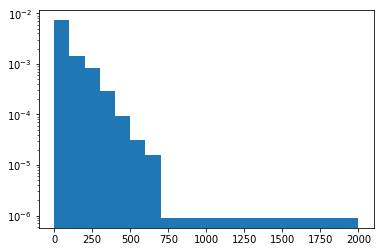

In [190]:
ptbins = [0, 100, 200, 300, 400, 500, 600, 700, 2000]
plt.hist(x=zbosons.pt.flatten(), bins=ptbins, log=True, density=True)
plt.show()


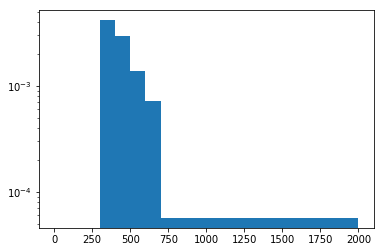

In [191]:
mbins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 2000]
plt.hist(x=zbosons.mass.flatten(), bins=mbins, log=True, density=True)
plt.show()